[View in Colaboratory](https://colab.research.google.com/github/Yozh2/ClocksOrCrocs/blob/master/NN_Test.ipynb)

# Тестируем нейросеть на любых изображениях
и оцениваем точность предсказаний. Для начала загрузим и скомпилируем нейросеть, которую мы обучили ранее.

In [45]:
import os
os.chdir('/content')

!git clone https://github.com/yozh2/ClocksOrCrocs.git


git_dir = '/content/ClocksOrCrocs'
os.chdir(git_dir)
!git pull

fatal: destination path 'ClocksOrCrocs' already exists and is not an empty directory.
Already up-to-date.


In [46]:
# Загружаем файлы с весами и архитектурой сети на виртуальную машину Google Colab
from google.colab import files
uploaded = files.upload()
uploaded

{}

In [51]:
!mv ClocksOrCrocs.h5 ./trained_net
!ls trained_net

ClocksOrCrocs.h5  ClocksOrCrocs.json


In [0]:
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.optimizers import Adam
import numpy
import os

# Загружаем данные об архитектуре сети из файла json
json_file = open("./trained_net/ClocksOrCrocs.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("./trained_net/ClocksOrCrocs.h5")

# Компилируем модель
loaded_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

# Тестируем сеть на отдельном изображении
Загрузим отдельное изображение из тестовой выборки и из поисковика Yandex, протестируем нашу нейросеть на точность.

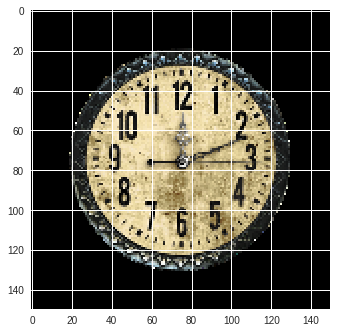

In [53]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img_height, img_width = 150, 150

img_path = './data/random_clock.png'
img = image.load_img(img_path, target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

plt.imshow(img)
plt.show()

Распознаём объект на изображении

In [54]:
prediction = loaded_model.predict(x)[0,0]
classes=['Crocodile', 'Clock']
print('{} with probability {:.5f}'.format(classes[int(prediction < 0.5)], max(prediction, 1-prediction)*100)) 

Clock with probability 99.92902


Видим, что случайно выбранное изображение определено весьма неплохо. Протестируем нейросеть на случайно выбранном крокодиле.

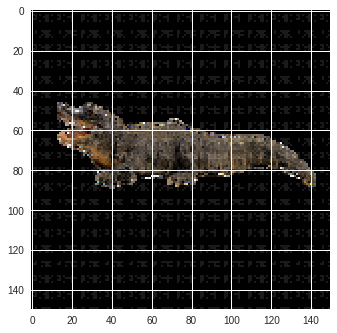

In [55]:
img_path = './data/random_croc.png'
img = image.load_img(img_path, target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

plt.imshow(img)
plt.show()

In [56]:
prediction = loaded_model.predict(x)[0,0]
classes=['Crocodile', 'Clock']
print('{} with probability {:.5f}'.format(classes[int(prediction < 0.5)], max(prediction, 1-prediction)*100)) 

Crocodile with probability 61.22106


В данном случае нейросеть была на грани фола, но всё равно правильно классифицировала изображение.

# Выводы
Обученная за достаточно короткое время нейросеть неплохо показала себя на тестовых изображениях, вручную найденных в поисковой системе Yandex.